#Uygulama 5: Rastgele Orman Algoritması (Random Forest) Uygulaması

**Veri seti hakkında bilgi**<br>

Bu veri seti ABD nüfusunun 1994 yılındaki nüfus sayımından toplanan verileri içerir. Veri seti, sayısal ve kategorik toplam 14 nitelikten oluşur. Bu nitelikler arasında yaş, çalışma sınıfı, eğitim, medeni durum, meslek, ırk, cinsiyet, haftalık çalışma saati, vb. bulunmaktadır. Veri setindeki hedef değişken, bir kişinin yıllık gelirinin 50.000 USD'nin üstünde olup olmama durumunu göstermektedir . Bu veri kümesi, sınıflandırma algoritmaları üzerinde çalışmak için yaygın şekilde kullanılmaktadır.


**Ön Hazırlık** 
*   Uyarıları kapatma

In [1]:
import warnings 
warnings.filterwarnings('ignore')

**1. Aşama: Veri Toplama**

In [2]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['yas', 'is_turu', 'gozlem_sayisi', 'egitim', 'egitim_seviyesi', 
           'evlilik_durum', 'meslek','iliski_durum', 'irk', 'cinsiyet', 
           'sermaye_kazani', 'sermaye_kaybi', 'haftalik_calisma_saati', 
           'anavatani', 'gelir']
df = pd.read_csv(url, header=None, names=columns)
df.head()

,yas,is_turu,gozlem_sayisi,egitim,egitim_seviyesi,evlilik_durum,meslek,iliski_durum,irk,cinsiyet,sermaye_kazani,sermaye_kaybi,haftalik_calisma_saati,anavatani,gelir
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Veri setinin orijinali hakkında bilgi almak için: https://archive.ics.uci.edu/ml/datasets/Adult<br>
**Veri seti sütun açıklamaları:**<br>
*  yaş: Bireylerin yaşı (sayısal veri)
*  iş sınıfı: Bireylerin çalıştığı işin sınıfı (kategorik veri)
*  gözlem ağırlığı: Toplumda karşılaşılma ağırlığı (sayısal veri)
*  eğitim: Bireylerin aldığı eğitim bitirdiği okul (kategorik veri)
*  eğitim seviyesi: Bireylerin aldığı eğitim seviyesi (sayısal veri)
*  evlilik durumu: Bireylerin medeni durumu (kategorik veri)
*  meslek: Bireylerin çalıştığı meslek (kategorik veri)
* aile rolü: Bireylerin aile içi durumu (kategorik veri)
*  ırk: Bireylerin ırkı (kategorik veri)
*  cinsiyet: Bireylerin cinsiyeti (kategorik veri)
* sermaya kazancı: Bireylerin sermaye kazancı (sayısal veri)
* sermaye kaybı: Bireylerin sermaye kaybı (sayısal veri)
* haftalık çalışma saati: Bireylerin haftalık çalışma saati (sayısal veri)
* ana: Bireylerin doğum ülkesi (kategorik veri)
income: Bireylerin yıllık geliri 50.000 $'dan büyük veya küçük olup olmadığı (kategorik veri)

**2. Aşama: Veri Ön İşleme**

*   Veri setine dair istatistiki bilgilerin görüntülenmesi.

In [3]:
print(df.describe())
print(df.info())

                yas  gozlem_sayisi  egitim_seviyesi  sermaye_kazani  \
count  32561.000000   3.256100e+04     32561.000000    32561.000000   
mean      38.581647   1.897784e+05        10.080679     1077.648844   
std       13.640433   1.055500e+05         2.572720     7385.292085   
min       17.000000   1.228500e+04         1.000000        0.000000   
25%       28.000000   1.178270e+05         9.000000        0.000000   
50%       37.000000   1.783560e+05        10.000000        0.000000   
75%       48.000000   2.370510e+05        12.000000        0.000000   
max       90.000000   1.484705e+06        16.000000    99999.000000   

       sermaye_kaybi  haftalik_calisma_saati  
count   32561.000000            32561.000000  
mean       87.303830               40.437456  
std       402.960219               12.347429  
min         0.000000                1.000000  
25%         0.000000               40.000000  
50%         0.000000               40.000000  
75%         0.000000           

*   Eksik veri ve kullanılmayacak özleliklerin verisetinden çıkarılması

In [4]:
# Veri setindeki '?' değerlerini NaN ile değiştirme ve satırları kaldırma

import numpy as np

df = df.replace(' ?', np.nan)

df = df.dropna()

*   Veri görselleştirerek ile veri setini inceleme

<AxesSubplot:xlabel='gelir', ylabel='count'>

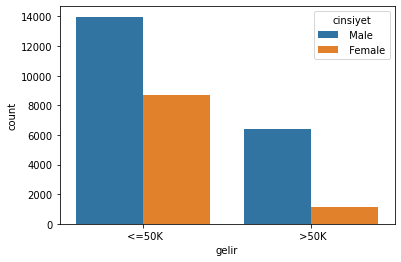

In [5]:
import seaborn as sns
sns.countplot(x='gelir',hue='cinsiyet',data=df)

*   Kategorik verilerin sayısal verilere çevrilmesi

In [6]:
df['gelir']=df['gelir'].apply(lambda x: 1 if x == ' >50K' else 0)
dummies= pd.get_dummies(df, columns=['is_turu', 'egitim', 'evlilik_durum', 'meslek',
                                 'iliski_durum', 'irk', 'cinsiyet', 'anavatani'])


print(dummies)
print(df.head())

       yas  gozlem_sayisi  egitim_seviyesi  sermaye_kazani  sermaye_kaybi  \
0       39          77516               13            2174              0   
1       50          83311               13               0              0   
2       38         215646                9               0              0   
3       53         234721                7               0              0   
4       28         338409               13               0              0   
...    ...            ...              ...             ...            ...   
32556   27         257302               12               0              0   
32557   40         154374                9               0              0   
32558   58         151910                9               0              0   
32559   22         201490                9               0              0   
32560   52         287927                9           15024              0   

       haftalik_calisma_saati  gelir  is_turu_ Federal-gov  \
0            


*   Girdi özellikleri ve hedef değişkeni (etiket) ayır

In [7]:
y = df['gelir']
df = pd.concat([df, dummies], axis=1)
df = df.drop(['is_turu', 'egitim', 'evlilik_durum', 'meslek',
              'iliski_durum', 'irk', 'cinsiyet', 'anavatani'], axis=1)
X = df.drop('gelir', axis=1)
print("Özellikler:\n ", X.head())
print("***********************")
print("Hedef     :\n", y.head())

Özellikler:
     yas  gozlem_sayisi  egitim_seviyesi  sermaye_kazani  sermaye_kaybi  \
0   39          77516               13            2174              0   
1   50          83311               13               0              0   
2   38         215646                9               0              0   
3   53         234721                7               0              0   
4   28         338409               13               0              0   

   haftalik_calisma_saati  yas  gozlem_sayisi  egitim_seviyesi  \
0                      40   39          77516               13   
1                      13   50          83311               13   
2                      40   38         215646                9   
3                      40   53         234721                7   
4                      40   28         338409               13   

   sermaye_kazani  ...  anavatani_ Portugal  anavatani_ Puerto-Rico  \
0            2174  ...                    0                       0   
1       

* Eğitim ve test verisini ayır.






In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

**3. Aşama: Model Oluşturma**

*  Random Forest modelini tanımlama ve eğitme

In [9]:
#Model seçme
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42)
params = {'n_estimators': [100, 200, 500], 'max_depth': [10, 20, 30]}
grid = GridSearchCV(rf, params, cv=5, scoring='accuracy')
#Modeli Eğitme
grid.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

 *  En iyi paretmetreleri seçme


In [10]:
print("En iyi parametreler: ", grid.best_params_)
best_rf = grid.best_estimator_

En iyi parametreler:  {'max_depth': 20, 'n_estimators': 200}


**4.Aşama : Modeli Test Etme**

*   Test verileri ile modeli değerlendirme

In [11]:
print("----------------------------------------------------------------")
print("Eğitim verisi için doğruluk :", best_rf.score(X_train, y_train))
print("----------------------------------------------------------------")
print("Test verisi için doğruluk   :", best_rf.score(X_test, y_test))

----------------------------------------------------------------
Eğitim verisi için doğruluk : 0.928384930995897
----------------------------------------------------------------
Test verisi için doğruluk   : 0.9290568539698326


*   Confusion Matrisi(Hata Matrisi) Tablo ve Grafik


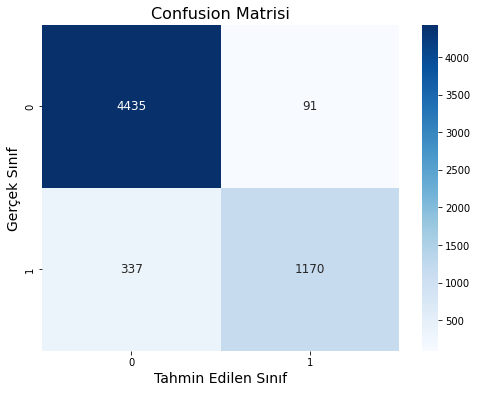

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Confusion matrisini hesaplama
y_pred = best_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# Confusion matrisini görselleştirme 
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax, fmt='d', annot_kws={"size": 12})
ax.set_xlabel('Tahmin Edilen Sınıf', fontsize=14)
ax.set_ylabel('Gerçek Sınıf', fontsize=14)
ax.set_title('Confusion Matrisi', fontsize=16)
plt.show()

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4526
           1       0.93      0.78      0.85      1507

    accuracy                           0.93      6033
   macro avg       0.93      0.88      0.90      6033
weighted avg       0.93      0.93      0.93      6033



**5.Aşama : Modeli Yayma**

*   Modeli yayma, kullanma

Geliştirlen model şirketler tarafından yeni işe alınacak kişilerin ücretlerini belirlemek için kullanılabilir. Ayrıca toplumsal olarak bakıldığında ise  ücretlendirme politikalarında olası adaletsizlikleri belirlemek amacıyla da kullanılabilir.   

 *  Random Forest karar yapsını ekrana çizme 

